In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras import layers

In [2]:
trainDataPath = './CS671-DLA-Assignment4-Data-2022/CV_Data/train'
testDataPath =  './CS671-DLA-Assignment4-Data-2022/CV_Data/test'

In [17]:
import numpy as np
import os
train_data = []
train_labels = []
test_data = []
test_labels = []
classes = [ name for name in os.listdir(trainDataPath) if os.path.isdir(os.path.join(trainDataPath, name)) ]

for idx,folder in enumerate(classes):
    trainfilePath = os.path.join(trainDataPath,folder)
    testFilePath = os.path.join(testDataPath,folder)

    for train_files in os.listdir(trainfilePath):
        train_data.append(np.loadtxt(os.path.join(trainfilePath,train_files)))
        train_labels.append(idx)
    
    for test_files in os.listdir(testFilePath):
        test_data.append(np.loadtxt(os.path.join(testFilePath,test_files)))
        test_labels.append(idx)


In [18]:
train_data = tf.keras.utils.pad_sequences(train_data,padding='post',value=10000000.0)
train_labels = tf.keras.utils.to_categorical(train_labels)

train_x,val_x,train_y,val_y = train_test_split(train_data,train_labels,shuffle=True,test_size=0.2)
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y,shuffle=True,test_size=0.2)
test_data = tf.keras.utils.pad_sequences(test_data,padding='post',value=10000000.0)
test_labels = tf.keras.utils.to_categorical(test_labels,num_classes=5)

In [22]:
model = keras.Sequential()
model.add(layers.Input(shape=(76,39),dtype='float'))
model.add(layers.Masking(mask_value=10000000.0))
model.add(layers.SimpleRNN(1,return_sequences=False)) #32
# model.add(layers.SimpleRNN(5))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(5,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_4 (Masking)         (None, 76, 39)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 1)                 41        
                                                                 
 dense_2 (Dense)             (None, 5)                 10        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20,min_delta=0.0001)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-8,beta_1=0.9,beta_2=0.999),
              metrics=['accuracy'])

In [24]:
res = model.fit(train_x,train_y,validation_data=(val_x,val_y),epochs=1000,callbacks=[callback])

Epoch 1/1000
29/29 [==============================] - 1s 11ms/step - loss: 1.6611 - accuracy: 0.1734 - val_loss: 1.6553 - val_accuracy: 0.1812
Epoch 2/1000
29/29 [==============================] - 0s 7ms/step - loss: 1.6425 - accuracy: 0.1778 - val_loss: 1.6398 - val_accuracy: 0.1916
Epoch 3/1000
29/29 [==============================] - 0s 7ms/step - loss: 1.6264 - accuracy: 0.1952 - val_loss: 1.6253 - val_accuracy: 0.1847
Epoch 4/1000
29/29 [==============================] - 0s 7ms/step - loss: 1.6120 - accuracy: 0.2039 - val_loss: 1.6124 - val_accuracy: 0.2125
Epoch 5/1000
29/29 [==============================] - 0s 7ms/step - loss: 1.5991 - accuracy: 0.2116 - val_loss: 1.5998 - val_accuracy: 0.2265
Epoch 6/1000
29/29 [==============================] - 0s 7ms/step - loss: 1.5876 - accuracy: 0.2148 - val_loss: 1.5893 - val_accuracy: 0.2544
Epoch 7/1000
29/29 [==============================] - 0s 7ms/step - loss: 1.5773 - accuracy: 0.2377 - val_loss: 1.5780 - val_accuracy: 0.2509
Epoch

In [265]:
eval = model.evaluate(test_x,test_y)

8/8 [==============================] - 0s 2ms/step - loss: 1.3377 - accuracy: 0.7522


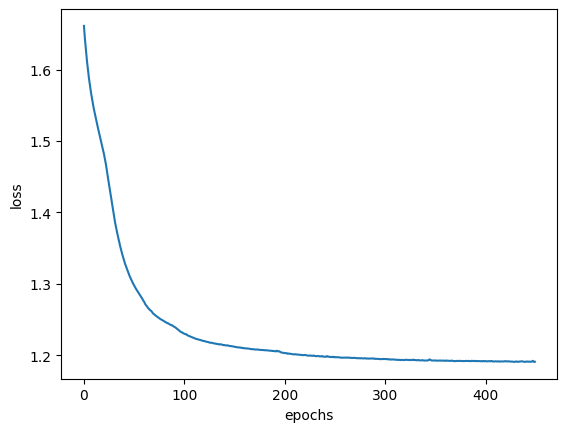

In [25]:
import matplotlib.pyplot as plt
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(res.history['loss'])

In [268]:
model_lstm = keras.Sequential()
model_lstm.add(layers.Input(shape=(76,39),dtype='float'))
model_lstm.add(layers.Masking(mask_value=10000000.0))
model_lstm.add(layers.LSTM(32,return_sequences=False))
# model_lstm.add(layers.SimpleRNN(5))
model_lstm.add(layers.Flatten())
model_lstm.add(layers.Dropout(0.2))
model_lstm.add(layers.Dense(5,activation='softmax'))
model_lstm.summary()

model_lstm.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-8,beta_1=0.9,beta_2=0.999),
              metrics=['accuracy'])

res_lstm = model_lstm.fit(train_x,train_y,validation_data=(val_x,val_y),epochs=1000,callbacks=[callback])

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_25 (Masking)        (None, 76, 39)            0         
                                                                 
 lstm_1 (LSTM)               (None, 76, 32)            9216      
                                                                 
 flatten_14 (Flatten)        (None, 2432)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2432)              0         
                                                                 
 dense_31 (Dense)            (None, 5)                 12165     
                                                                 
Total params: 21,381
Trainable params: 21,381
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
29/29 [=============================

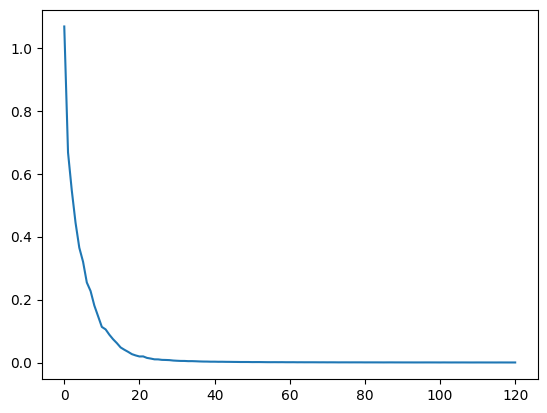

In [269]:
plt.plot(res_lstm.history['loss'])